# MNIST dataset 

This notebook provides a detailed insight of the NN architecture used.

### Importing the necessary libraries

---

*   TensorFlow (v2.2)
*   Tensorflowjs
*   Matplotlib

In [1]:
import tensorflow as tf
print(tf.__version__)
import tensorflowjs as tfjs
from tensorflow import keras
from keras.layers import Flatten, Dense
import matplotlib.pyplot as plt

2.4.1


### Importing the dataset

---
The MNIST dataset, often termed as the "Hello World" for Neural Networks, is available in the Keras API and can be imported easily.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

### Data Preprocessing

---
Printing the 1st image from training set

shape of image : (28, 28)


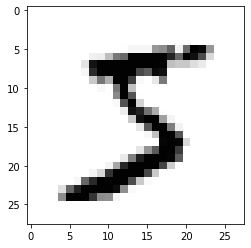

In [3]:
plt.imshow(x_train[0], cmap='Greys')
print('shape of image : ' + str(x_train[0].shape))

Reshaping the array to 4-dims so that it can work with the Keras API

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

Checking if the output(y) is `categorical` or not.


In [7]:
print('y of 1st training example : '+str(y_train[0]))

y of 1st training example : 5


The pixel values range from 0-255.

Normalising the data can increase the performance of the model.

In [8]:
x_train, x_test = x_train/255.0, x_test/255.0

Details of data

In [9]:
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])
print('y_train shape:', y_train.shape)
print('Number of images in y_train', y_train.shape[0])
print('Number of images in y_test', y_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000
y_train shape: (60000,)
Number of images in y_train 60000
Number of images in y_test 10000


### Building the model
---

The model is architectured as:
FLATTEN -> DENSE(128) -> DENSE(60) ->DENSE(30) -> OUTPUT(10)

Fortunately, we have Keras API which can construct the computational graph in just 4-5 lines of code. More about `Sequential`, `Dense` can be found [here](https://keras.io/api/).

In [10]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28,1)),
                             tf.keras.layers.Dense(units=64, activation='relu'),
                             tf.keras.layers.Dense(units=32, activation='relu'),
                             tf.keras.layers.Dense(units=10, activation='softmax')
                            ])

Summary of model

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


Compiling the model with `Adam` optimizer and `Categorical cross entropy` as the loss function. 

The loss function describes how bad the model is and optimizer is responsible for improving the model.

In [12]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Training the model on `x_train`, `y_train` for 10 epochs

In [13]:
# model.fit(datagen.flow(x_train, y_train, batch_size=num, shuffle=False), epochs=10, validation_data=(x_test, y_test))
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.7513 - accuracy: 0.7910 - val_loss: 0.2126 - val_accuracy: 0.9388
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1919 - accuracy: 0.9454 - val_loss: 0.1600 - val_accuracy: 0.9554
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1395 - accuracy: 0.9595 - val_loss: 0.1351 - val_accuracy: 0.9603
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1120 - accuracy: 0.9670 - val_loss: 0.1156 - val_accuracy: 0.9656
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0957 - accuracy: 0.9724 - val_loss: 0.1091 - val_accuracy: 0.9676
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0794 - accuracy: 0.9765 - val_loss: 0.1102 - val_accuracy: 0.9681
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0687 - accuracy: 0.9786 - val_loss: 0.1023 - val_accuracy: 0.9701
Epoch 

Evaluating the model with `x_test` and `y_test`

In [14]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0871 - accuracy: 0.9747


[0.08710919320583344, 0.9746999740600586]

Trying the output with random test example

6


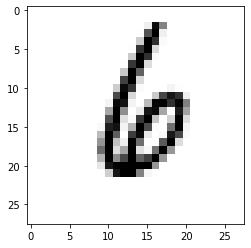

In [15]:
plt.imshow(x_test[4412].reshape(28,28), cmap='Greys')
pred = model.predict(x_test[4412].reshape(1,28,28,1))
print(pred.argmax())

In [16]:
tfjs.converters.save_keras_model(model, 'models')

/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/keras_h5_conversion.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)
